# **Bike Share Replacement Model at Queens College**
By: Dee Slawotsky, Tasfia Hossain, Nirvana Persaud

#Imports

In [ ]:
# install Pint if necessary
try:
    from pint import UnitRegistry
except ImportError:
    !pip install pint

     |████████████████████████████████| 209 kB 9.8 MB/s 


In [ ]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [ ]:
# import functions from modsim

from modsim import *

In [ ]:
import numpy as np

# Functions

In [ ]:
#tracks the replacement of the bikes, when there is movement from each station
#this is tracking the bikes at Queens Hall

def bike_to_kielyHall(State): 
  if State.queensHall == 0: #if there are no bikes available at Queens Hall
    return #function returns nothing

  State.kielyHall += 1 #bike is going from Q.H to Kiely, so Kiely will gain a bike at its station
  State.queensHall -= 1 #bike is leaving Q.H, so subtract a bike from that station
  State.rides += 1 #counter to track the number of rides 
  return

In [ ]:
#tracks the replacement of the bikes, when there is movement from each station
#this is tracking the bikes at Kiely Hall

def bike_to_queensHall(State):
  if State.kielyHall == 0:  #if there are no bikes available at Kiely Hall
    return  #function returns nothing

  State.queensHall += 1  #bike is going from Q.H to Kiely, so Kiely will gain a bike at its station
  State.kielyHall -= 1  #bike is leaving Q.H, so subtract a bike from that station
  State.rides +=1 #counter to track the number of rides 
  return

In [ ]:
#simulation to track the movement of these bikes from every station

def step(State, p1, p2): #p1 and p2 represent the proabilities we will define
  if flip(p1):
    bike_to_kielyHall(State) #tracking the bikes at Kiely
    if State.rides == 50: #expecting the bikes to break down after 50 rides
      newBikeKiely(State) # so we will purchase a new bike
      #print("new bike purchased")
  if flip(p2):
    bike_to_queensHall(State) #same will occur for p2/Queens Hall station ^
    if State.rides == 50:
      newBikeQueens(State) 
      #print("new bike purchased")

#Simulation and Visualizations


In [ ]:
#created a timeSeries to run the simulation and collect data from there to create a better visualization of our data

def runSimulation(State, p1, p2, numsteps):

  timeSeriesQ = TimeSeries()
  timeSeriesQ[0] = 0 #initial number of bikes at Q.H

  timeSeriesK = TimeSeries()
  timeSeriesK[0] = 0  #initial number of bikes at K.H

  timeSeriesQT = TimeSeries()
  timeSeriesQT [0] = State.queensHall

  timeSeriesKT = TimeSeries()
  timeSeriesKT [0] = State.kielyHall

  for j in range(30): #going from 0-30, representing each day making up a month
    for i in range(numsteps):
      step(State, p1, p2)
    timeSeriesK[j + 1] = State.kielyReplaced #track how many bikes were replaced at Kiely over the course of a month
    timeSeriesQ[j + 1] = State.queensReplaced
    timeSeriesKT[j + 1] = State.kielyHall #track how many bikes were used at Kiely over the course of a month
    timeSeriesQT[j + 1] = State.queensHall


  timeSeriesQ.plot(label='Queens', color='#B983FF') #plotting the graph
  timeSeriesK.plot(label='Kiely', color='#94DAFF')
  decorate(title='Bike Replacement',
             xlabel='Time Step (day)',
             ylabel='Amount Replaced')
    
  plotdataKT = pd.DataFrame(timeSeriesKT)
  plotdataKT.plot(kind="bar", color='#94DAFF', xlabel='Days in Kiely Hall')
  plotdataQT = pd.DataFrame(timeSeriesQT)
  plotdataQT.plot(kind="bar", color='#B983FF', xlabel='Days in Queens Hall')

In [ ]:
def newBikeKiely(State):
    if State.kielyHall >= State.queensHall: #if there are less bikes at Queens Hall, even tho it broke at Kiely, add it to Queens to balance it
      State.queensReplaced += 1
      State.kielyHall -= 1 #the one from Kiely broke
      State.queensHall += 1 
    else:
      State.kielyReplaced += 1  #add the replacement count at Kiely, as it has been replaced at arrival
    State.rides = 0

In [ ]:
def newBikeQueens(State):
    if State.queensHall >= State.queensHall: #if there are less bikes at Kiely Hall, even tho it broke at Queens, add it to Kiely to balance it
      State.kielyReplaced += 1
      State.kielyHall += 1
      State.queensHall -= 1 #the one from Queens broke
    else:
      State.queensReplaced += 1 #add the replacement count at Queens, as it has been replaced at arrival
    State.rides = 0

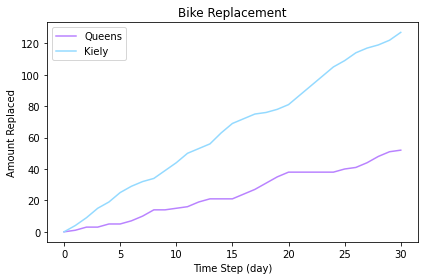

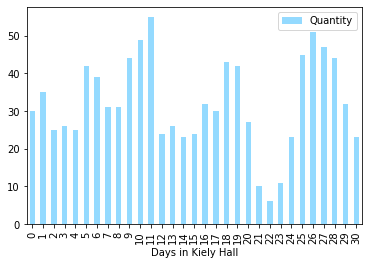

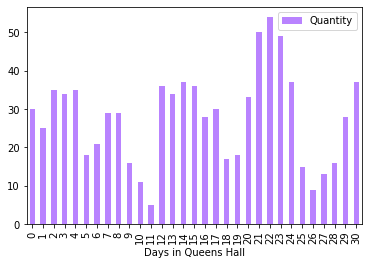

In [ ]:
bikeshare = State(queensHall=30, kielyHall=30, rides=0, kielyReplaced=0, queensReplaced=0)
runSimulation(bikeshare, 0.5, 0.5, 300)